In [1]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours
import imutils

In [2]:
model = load_model(r"C:\Users\Enes\Desktop\OCR\network")


In [11]:
img =  cv2.imread("test.jpeg")
cv2.imshow("test image",img)
cv2.waitKey(0)


-1

In [12]:
def preprocessing(img):
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    value, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    img = cv2.resize(thresh,(28,28))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=-1)
    img = np.reshape(img, (1,28,28,1))
    return img

In [13]:
img2 = preprocessing(img)

In [14]:
img2.shape

(1, 28, 28, 1)

In [5]:
name_labels = '0123456789'
name_labels+="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
name_labels = [l  for l in name_labels]

In [47]:
prediction = model.predict(img2)

In [37]:
prediction

array([[1.34500291e-03, 3.71983871e-02, 2.92313337e-01, 2.52755731e-02,
        4.06253263e-02, 2.05360446e-02, 2.48461333e-03, 9.87663865e-02,
        3.79039906e-02, 3.32866004e-03, 8.89840629e-03, 3.18779750e-03,
        4.49467078e-03, 1.14840465e-02, 2.50541652e-03, 4.81362065e-07,
        1.75870750e-02, 1.04706436e-02, 2.47974531e-04, 1.98992398e-02,
        1.25665367e-02, 7.57932104e-03, 7.69356312e-03, 1.41530996e-02,
        4.00276436e-03, 1.09242578e-03, 7.10946551e-05, 1.83071941e-03,
        4.48848046e-02, 1.39014702e-02, 2.11964380e-02, 7.93795789e-06,
        1.91367650e-03, 6.30159527e-02, 5.81594445e-02, 1.09377757e-01]],
      dtype=float32)

In [48]:
i=np.argmax(prediction)

In [49]:
name_labels[i]

'3'

0 inci dosya  C:\Users\Enes\Desktop\OCR\testImage1\img026-014.png
1 inci dosya  C:\Users\Enes\Desktop\OCR\testImage1\img026-015.png
2 inci dosya  C:\Users\Enes\Desktop\OCR\testImage1\img026-016.png
3 inci dosya  C:\Users\Enes\Desktop\OCR\testImage1\img026-017.png
4 inci dosya  C:\Users\Enes\Desktop\OCR\testImage1\img028-012.png
5 inci dosya  C:\Users\Enes\Desktop\OCR\testImage1\img028-013.png
6 inci dosya  C:\Users\Enes\Desktop\OCR\testImage1\img028-014.png
7 inci dosya  C:\Users\Enes\Desktop\OCR\testImage1\img028-016.png
8 inci dosya  C:\Users\Enes\Desktop\OCR\testImage1\img028-017.png
9 inci dosya  C:\Users\Enes\Desktop\OCR\testImage1\img028-018.png
10 inci dosya  C:\Users\Enes\Desktop\OCR\testImage1\img045-021.png
11 inci dosya  C:\Users\Enes\Desktop\OCR\testImage1\img045-022.png
12 inci dosya  C:\Users\Enes\Desktop\OCR\testImage1\img045-023.png
13 inci dosya  C:\Users\Enes\Desktop\OCR\testImage1\img045-024.png
14 inci dosya  C:\Users\Enes\Desktop\OCR\testImage1\img045-025.png
15 in

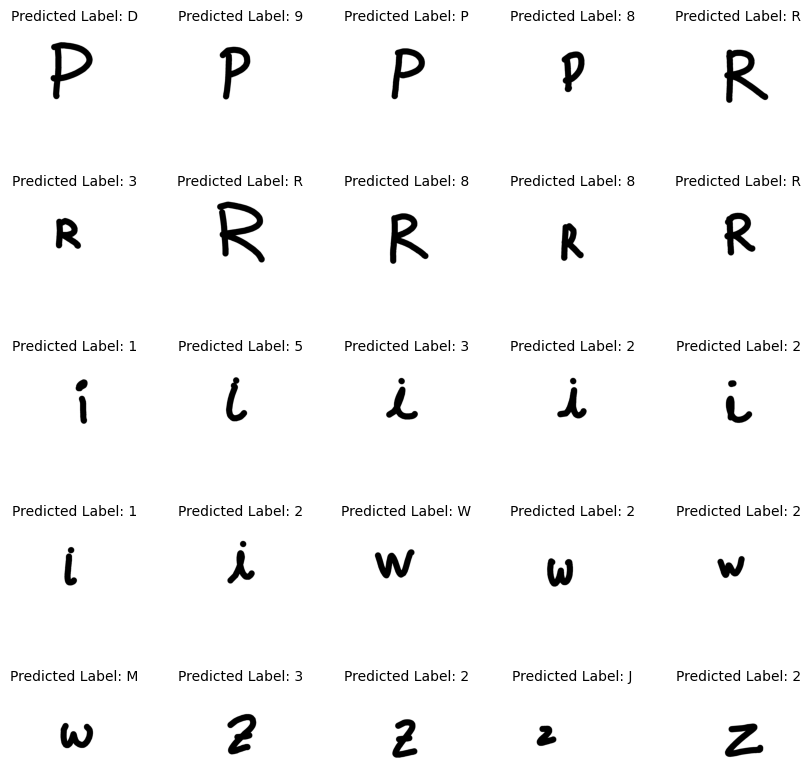

In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the pre-trained model
loaded_model = load_model(r"C:\Users\Enes\Desktop\OCR\network")

# Function to predict and display images and labels
def predict_images(folder_path, model):
    # Get file names in the folder
    file_names = os.listdir(folder_path)
    
    # Create subplots
    num_images = len(file_names)-1
    num_rows = (num_images + 1) // 2
    
    fig, axes = plt.subplots(5, 5, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i, file_name in enumerate(file_names):
        # Read the image
        img_path = os.path.join(folder_path, file_name)
        print("{i} inci dosya ".format(i=i),img_path)
        img = cv2.imread(img_path)
        
        # Preprocess the image
        img= preprocessing(img)

        # Predict the label
        prediction = model.predict(img)
        index= np.argmax(prediction)
        label = name_labels[index]
        
         # Plot the image and label

        row = i // 5
        col = i % 5
        axes[row, col].imshow(cv2.imread(img_path))
        axes[row, col].set_title(f"Predicted Label: {label}", fontsize=10)
        axes[row, col].axis('off')

    
    # Hide empty subplots if there are any
    for i in range(num_images, num_rows * 2):
        fig.delaxes(axes[i // 2, i % 2])
    
    plt.show()

# Folder path containing images
folder_path = r"C:\Users\Enes\Desktop\OCR\testImage1"

# Predict and display images and labels 
predict_images(folder_path, loaded_model)


0 inci dosya  C:\Users\Enes\Desktop\OCR\testImage1\img026-014.png


NameError: name 'preprocessing' is not defined

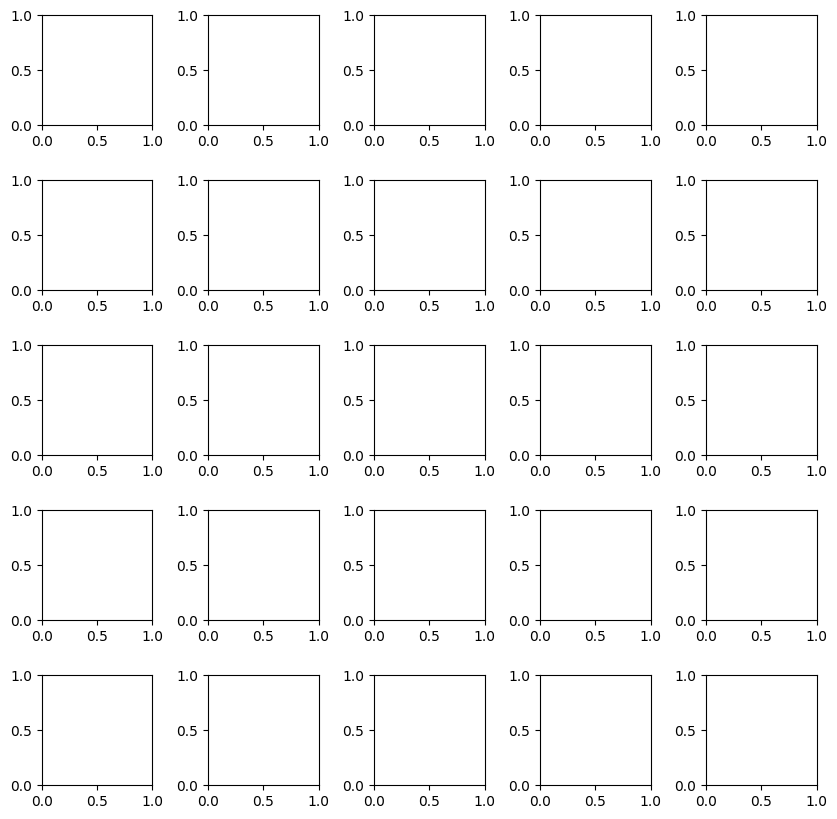

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the pre-trained model
loaded_model = load_model(r"C:\Users\Enes\Desktop\OCR\network")

# Function to predict and display images and labels
def predict_images(folder_path, model):
    # Get file names in the folder
    file_names = os.listdir(folder_path)
    
    # Create subplots
    num_images = len(file_names)-1
    num_rows = (num_images + 1) // 2
    
    fig, axes = plt.subplots(5, 5, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i, file_name in enumerate(file_names):
        # Read the image
        img_path = os.path.join(folder_path, file_name)
        print("{i} inci dosya ".format(i=i),img_path)
        img = cv2.imread(img_path)
        
        # Preprocess the image
        img= preprocessing(img)

        # Predict the label
        prediction = model.predict(img)
        index= np.argmax(prediction)
        label = name_labels[index]
        
         # Plot the image and label

        row = i // 5
        col = i % 5
        axes[row, col].imshow(cv2.imread(img_path))
        axes[row, col].set_title(f"Predicted Label: {label}", fontsize=10)
        axes[row, col].axis('off')

    
    # Hide empty subplots if there are any
    for i in range(num_images, num_rows * 2):
        fig.delaxes(axes[i // 2, i % 2])
    
    plt.show()

# Folder path containing images
folder_path = r"C:\Users\Enes\Desktop\OCR\testImage1"

# Predict and display images and labels 
predict_images(folder_path, loaded_model)